<a href="https://colab.research.google.com/github/ykykyk112/machine_learning/blob/main/sklearn_exercise/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import cv2
from google.colab import drive
from PIL import Image
from sklearn.model_selection import GridSearchCV

In [ ]:
mnist = fetch_openml('mnist_784')
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
X = mnist['data']
y = mnist['target']

In [ ]:
# dataset upzip code
#!unzip /content/drive/MyDrive/Colab_Notebooks/image/Test_set.zip -d /content/drive/MyDrive/Colab_Notebooks/image
#!unzip /content/drive/MyDrive/Colab_Notebooks/image/Training_set.zip -d /content/drive/MyDrive/Colab_Notebooks/image

In [ ]:
print(X.shape)
image = X[0].reshape(28, 28)
image.shape

(70000, 784)


(28, 28)

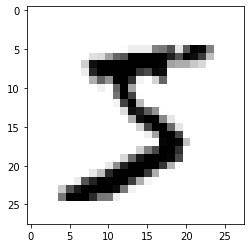

In [ ]:
plt.imshow(image, cmap = 'binary')
plt.show()

In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
y.shape

(70000,)

In [ ]:
test = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/image/Test_set/Avocado/000.jpg', cv2.IMREAD_COLOR)
nonetype = type(test)

In [ ]:
fruit_name = ['Avocado', 'Banana', 'Blueberry', 'Chestnut', 'Corn', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pear', 'Strawberry']
path_for_test = '/content/drive/MyDrive/Colab_Notebooks/image/Test_set/'
path_for_training = '/content/drive/MyDrive/Colab_Notebooks/image/Training_set/'

def make_ndarray(path, fruit_name) :
    first = True
    for index, name in enumerate(fruit_name) :
        folder = path + '{}/'.format(name)
        for i in range(500) :
            file_name = folder+'{:03d}.jpg'.format(i+1)
            if first :
                input_image = cv2.imread(file_name, cv2.IMREAD_COLOR)
                image_set = input_image.reshape(1, 100, 100, 3)
                data_set = input_image/255
                data_set = data_set.reshape(1, 10000, 3)
                label_set = np.array([str(index)])
                first = False
                if type(input_image) is nonetype :
                    print('return -1')
                    return
            else :
                input_image = cv2.imread(file_name, cv2.IMREAD_COLOR)
                if type(input_image) is nonetype :
                    print('{0} 종료'.format(name))
                    break
                for_image_set = input_image.reshape(1, 100, 100, 3)
                image_set = np.append(image_set, for_image_set, axis = 0)
                image_scaled = input_image/255
                image_reshaped = image_scaled.reshape(1, 10000, 3)
                data_set = np.append(data_set, image_reshaped, axis = 0)
                arr = np.array([str(index)])
                label_set = np.append(label_set, arr, axis = 0)
        print('for {0} - {1} complete'.format(name, i))
        print("data set's shape : {}".format(data_set.shape))
    return data_set, image_set, label_set

def shuffle_data_label(data, label) :
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)
    data = data[idx]
    label = label[idx]
    return data, label

test_data, test_image, test_label = make_ndarray(path_for_test, fruit_name)
training_data, training_image, training_label = make_ndarray(path_for_training, fruit_name)

Avocado 종료
for Avocado - 143 complete
data set's shape : (143, 10000, 3)
Banana 종료
for Banana - 166 complete
data set's shape : (309, 10000, 3)
Blueberry 종료
for Blueberry - 154 complete
data set's shape : (463, 10000, 3)
Chestnut 종료
for Chestnut - 153 complete
data set's shape : (616, 10000, 3)
Corn 종료
for Corn - 150 complete
data set's shape : (766, 10000, 3)
Kiwi 종료
for Kiwi - 156 complete
data set's shape : (922, 10000, 3)
Lemon 종료
for Lemon - 164 complete
data set's shape : (1086, 10000, 3)
Mango 종료
for Mango - 166 complete
data set's shape : (1252, 10000, 3)
Orange 종료
for Orange - 160 complete
data set's shape : (1412, 10000, 3)
Peach 종료
for Peach - 164 complete
data set's shape : (1576, 10000, 3)
Pear 종료
for Pear - 164 complete
data set's shape : (1740, 10000, 3)
Strawberry 종료
for Strawberry - 164 complete
data set's shape : (1904, 10000, 3)
Avocado 종료
for Avocado - 427 complete
data set's shape : (427, 10000, 3)
Banana 종료
for Banana - 490 complete
data set's shape : (917, 10000,

In [ ]:
X_test = np.load('/content/drive/MyDrive/Colab_Notebooks/image/test_data_shuffled.npy')
X_train = np.load('/content/drive/MyDrive/Colab_Notebooks/image/training_data_shuffled.npy')
y_test = np.load('/content/drive/MyDrive/Colab_Notebooks/image/test_label_shuffled.npy')
y_train = np.load('/content/drive/MyDrive/Colab_Notebooks/image/training_label_shuffled.npy')
image_test = np.load('/content/drive/MyDrive/Colab_Notebooks/image/test_image_shuffled.npy')
image_training = np.load('/content/drive/MyDrive/Colab_Notebooks/image/training_image_shuffled.npy')
X_test = X_test.reshape(X_test.shape[0], 30000)
X_train = X_train.reshape(X_train.shape[0], 30000)

print(X_test.shape)
print(X_train.shape)

(1904, 30000)
(5682, 30000)


In [ ]:
fruit_name = ['Avocado', 'Banana', 'Blueberry', 'Chestnut', 'Corn', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pear', 'Strawberry']
first = True
for index, name in enumerate(fruit_name) :
    if first :
        target = np.array([str(index)])
        first = False
    else :
        arr = np.array([str(index)])
        target = np.append(target, arr, axis = 0)
print(target.shape)
print(target)
print(y.shape)

S = np.arange(target.shape[0])
np.random.shuffle(S)

target = target[S]
print(target)

def shuffle_data_label(data, label) :
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)
    data = data[idx]
    label = label[idx]
    return data, shuffle_data_label



(12,)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
(70000,)
['2' '0' '7' '10' '6' '3' '9' '4' '11' '1' '8' '5']


In [ ]:
def shuffle_ndarray(data, image, label) :
    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)
    data = data[idx]
    image = image[idx]
    label = label[idx]
    return data, image, label

test_data_shuffled, test_image_shuffled, test_label_shuffled = shuffle_ndarray(test_data, test_image, test_label)
training_data_shuffled, training_image_shuffled, training_label_shuffled = shuffle_ndarray(training_data, training_image, training_label)

In [ ]:
print(test_data_shuffled.shape, test_image_shuffled.shape, test_label_shuffled.shape)
print(training_data_shuffled.shape, training_image_shuffled.shape, training_label_shuffled.shape)

(1904, 10000, 3) (1904, 100, 100, 3) (1904,)
(5682, 10000, 3) (5682, 100, 100, 3) (5682,)


In [ ]:
np.save('/content/drive/MyDrive/Colab_Notebooks/image/test_data_shuffled', test_data_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/test_image_shuffled', test_image_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/test_label_shuffled', test_label_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/training_data_shuffled', training_data_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/training_image_shuffled', training_image_shuffled)
np.save('/content/drive/MyDrive/Colab_Notebooks/image/training_label_shuffled', training_label_shuffled)

In [ ]:
test_data_reshaped = test_data_shuffled.reshape(1904, 30000)
training_data_reshaped = training_data_shuffled.reshape(5682, 30000)
print(test_data_reshaped.shape)
print(training_data_reshaped.shape)

(1904, 30000)
(5682, 30000)


In [ ]:
from sklearn.svm import SVC
linear_svc = SVC(kernel = 'linear', random_state=42)
rbf_svc = SVC(kernel = 'rbf', random_state=42)
poly_svc = SVC(kernel = 'poly', random_state=42)
sigmoid_svc = SVC(kernel = 'sigmoid', random_state=42)

linear_svc.fit(training_data_reshaped, training_label_shuffled)
rbf_svc.fit(training_data_reshaped, training_label_shuffled)
poly_svc.fit(training_data_reshaped, training_label_shuffled)
sigmoid_svc.fit(training_data_reshaped, training_label_shuffled)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
pred_linear = linear_svc.predict(test_data_reshaped)
pred_rbf = rbf_svc.predict(test_data_reshaped)
pred_poly = poly_svc.predict(test_data_reshaped)
pred_sigmoid = sigmoid_svc.predict(test_data_reshaped)

linear_score = accuracy_score(pred_linear, test_label_shuffled)
rbf_score = accuracy_score(pred_rbf, test_label_shuffled)
poly_score = accuracy_score(pred_poly, test_label_shuffled)
sigmoid_score = accuracy_score(pred_sigmoid, test_label_shuffled)

print(linear_score)
print(rbf_score)
print(poly_score)
print(sigmoid_score)

0.9464285714285714
0.9364495798319328
0.9480042016806722
0.045168067226890755


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_label_shuffled, pred_data)
print(cf)

[[141   0   0   0   0   0   0   0   0   2   0   0]
 [  0 150   0   0   0   0  16   0   0   0   0   0]
 [  0   0 154   0   0   0   0   4   6   0   0   0]
 [  0  19   0 145   0   0   0   0   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0   0   0   0]
 [  0   0   0   0   0 153   0   0   0   0   0   0]
 [  0   0  11   0   0   0 103   7  29   0   0   0]
 [  0   0   6   0   0   0   0 150   0   0   0   0]
 [  0   0   0   0   0   0   0   0 164   0   0   0]
 [  0   0   0   0   0   0   0   0   0 166   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160   0]
 [  0   0   0   0   0   0   0   4   0   0   0 160]]


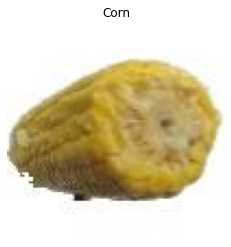

In [ ]:
def plot_image(image, label) :
    fruit_map = {'0':'Avocado', '1':'Banana', '2':'Blueberry', '3':'Chestnut', '4':'Corn', '5':'Kiwi', '6':'Lemon', 
                 '7':'Mango', '8':'Orange', '9':'Peach', '10':'Pear', '11':'Strawberry'}
    plt.imshow(image)
    plt.axis('off')
    plt.title('{}'.format(fruit_map[label]))
    plt.show()

sample_image = image_test[9]
sample_label = y_test[9]

sample_image_cvt = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plot_image(sample_image_cvt, sample_label)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_test_scaled = std_scaler.fit_transform(X_test)
X_train_scaled = std_scaler.fit_transform(X_train)

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'poly', random_state=42, C = 1, probability=True)
svm_clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = svm_clf.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.9480042016806722


In [ ]:
y_pred_proba = svm_clf.predict_proba(X_test)
print(y_pred_proba)

[[6.80227172e-05 5.48668790e-04 3.52914113e-03 ... 1.08231265e-04
  8.05554311e-05 3.06693740e-04]
 [5.15510177e-02 3.75650910e-04 3.03123732e-04 ... 1.25908111e-03
  1.31410728e-04 5.15018331e-04]
 [9.57290077e-03 2.16658486e-04 1.12726671e-03 ... 1.10624151e-03
  2.79313441e-03 9.54860188e-01]
 ...
 [2.87458264e-04 2.14267256e-04 2.70290201e-04 ... 3.55915077e-04
  9.93474358e-01 3.32699758e-03]
 [7.33957563e-03 2.64484979e-04 1.32871736e-03 ... 1.25790979e-03
  2.20485978e-03 9.51016027e-01]
 [1.68608180e-01 2.19311517e-04 4.95084054e-04 ... 1.62522806e-03
  1.74978035e-04 4.84989913e-04]]


In [ ]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 144,   0,   0,   0,   0,  22,   0,   0,   0,   0,   0],
       [  0,   0, 164,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 164,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 154,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0, 147,   0,   0,   0,   0,   0,   0],
       [  0,   0,  15,   0,   0,   0,  79,   0,  56,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 156,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 164,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 166,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 164]])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train = X_train.reshape(5682, 30000)
rbf_svc = SVC(kernel = 'rbf', C = 30, random_state=42)

rbf_svc.fit(X_train, y_train)
y_pred = rbf_svc.predict(X_train)

score = accuracy_score(y_pred, y_train)
score

1.0

In [ ]:
X_test = X_test.reshape(-1, 30000)
y_pred_test = rbf_svc.predict(X_test)
score_test = accuracy_score(y_pred_test, y_test)
score_test

0.9406512605042017

In [ ]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state = 42)
svm_clf.fit(X_train, y_train)
score = svm_clf.score(X_test, y_test)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9448529411764706


In [ ]:
best_score = -1
best_param = -1
for c in [0.01, 0.1, 0.5, 1, 5, 10] :
    svm_clf = LinearSVC(C = c, verbose=2, random_state=42)
    svm_clf.fit(X_train, y_train)
    score = svm_clf.score(X_test, y_test)
    if score > best_score :
        best_score = score
        best_param = c

print(best_score, best_param)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9453781512605042 0.5


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[141,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  0, 150,   0,   0,   0,   0,  16,   0,   0,   0,   0,   0],
       [  0,   0, 154,   0,   0,   0,   0,   4,   6,   0,   0,   0],
       [  0,  19,   0, 145,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 154,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 153,   0,   0,   0,   0,   0,   0],
       [  0,   0,  11,   0,   0,   0, 103,   7,  29,   0,   0,   0],
       [  0,   0,   6,   0,   0,   0,   0, 150,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 164,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 166,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0, 160]])

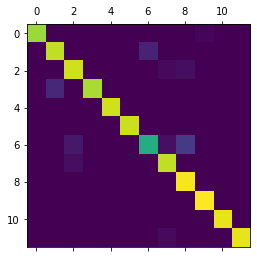

In [ ]:
plt.matshow(cf)

# 새 섹션

In [ ]:
import time
def get_time(duration) :
    minute = int(duration//60)
    sec = int(duration%60)
    hour = minute//60
    minute = minute%60
    print('Duration time : {0:02d}H {1:02d}M {2:02d}S'.format(hour, minute, sec))

In [ ]:
from sklearn.svm import LinearSVC, SVC

start = time.time()

svm_clf = LinearSVC(C = 1, random_state = 42)
svm_clf.fit(X_train, y_train)

end = time.time()
duration = end-start

get_time(duration)

score = svm_clf.score(X_test, y_test)
print('\nscore :', score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Duration time : 00H 05M 53S

score : 0.9448529411764706


In [ ]:
# SVC - nonscaling
start = time.time()

kernel_clf = SVC(kernel = 'linear', random_state = 42, max_iter=1000)
kernel_clf.fit(X_train, y_train)

end = time.time()
duration = end-start

get_time(duration)

kernel_score = kernel_clf.score(X_test, y_test)
print('\nscore :', kernel_score)

Duration time : 00H 02M 09S

score : 0.9464285714285714


In [ ]:
start = time.time()

rbf_clf = SVC(kernel = 'rbf', random_state = 42, max_iter=1000)
rbf_clf.fit(X_train, y_train)

end = time.time()
duration = end-start

get_time(duration)

rbf_score = rbf_clf.score(X_test, y_test)
print('\nscore :', rbf_score)

Duration time : 00H 03M 28S

score : 0.9364495798319328


In [ ]:
from sklearn.model_selection import GridSearchCV

svm_clf = LinearSVC(random_state = 42)
param_grid={'C' :[0.05, 0.5, 1, 5, 50]}

grid_search = GridSearchCV(svm_clf, param_grid=param_grid, cv = 3, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=0.05, score=0.999, total= 5.4min
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.4min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=0.05, score=0.999, total= 5.5min
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.9min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .............................. C=0.05, score=1.000, total= 5.4min
[CV] C=0.5 ...........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 16.3min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=0.5, score=0.999, total= 5.4min
[CV] C=0.5 ...........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 21.7min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=0.5, score=0.999, total= 5.5min
[CV] C=0.5 ...........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 27.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ............................... C=0.5, score=1.000, total= 5.4min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 32.6min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.999, total= 5.4min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 38.0min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=0.999, total= 5.3min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 43.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=1, score=1.000, total= 5.2min
[CV] C=5 .............................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 48.4min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=5, score=0.999, total= 5.2min
[CV] C=5 .............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=5, score=0.999, total= 4.7min
[CV] C=5 .............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=5, score=1.000, total= 4.5min
[CV] C=50 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=50, score=0.999, total= 4.6min
[CV] C=50 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=50, score=0.999, total= 4.6min
[CV] C=50 ............................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=50, score=1.000, total= 4.5min


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 76.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.5, 1, 5, 50]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=10)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.05}
0.9996480112636396


In [ ]:
svm_clf = LinearSVC(C = 0.05, random_state = 42)
svm_clf.fit(X_train, y_train)

best_param_score = svm_clf.score(X_test, y_test)
best_param_score

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9448529411764706

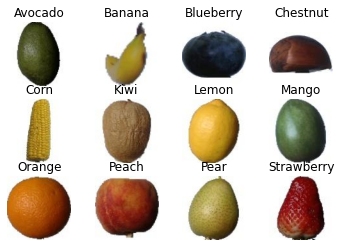

In [ ]:
fruit_name = ['Avocado', 'Banana', 'Blueberry', 'Chestnut', 'Corn', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pear', 'Strawberry']
path_for_test = '/content/drive/MyDrive/Colab_Notebooks/image/Test_set/'

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
rows = 3
cols = 4

for index, name in enumerate(fruit_name) :
    path = path_for_test+name+'/001.jpg'
    img = cv2.imread(path)
    ax = fig.add_subplot(rows, cols, index+1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(name)
    ax.axis("off")
 
plt.show()

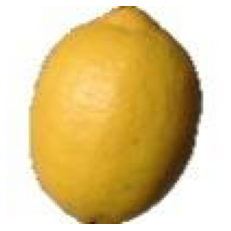

(100, 100, 3)


In [ ]:
path = path_for_test+'Lemon/001.jpg'
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(img.shape)

In [ ]:
print('Train set')
print(X_train.shape, y_train.shape)
print('Train set')
print(X_test.shape, y_test.shape)

Train set
(5682, 30000) (5682,)
Train set
(1904, 30000) (1904,)


In [ ]:
X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.fit_transform(X_test)
print(X_train_scale.shape)
print(X_test_scale.shape)

(5682, 30000)
(1904, 30000)


In [ ]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C = 1, random_state = 42)
svm_clf.fit(X_train_scale, y_train)
scaled_score = svm_clf.score(X_test_scale, y_test)
scaled_score

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8046218487394958

In [ ]:
print(X_train[0])
print(X_train_scale[0])

[1. 1. 1. ... 1. 1. 1.]
[0.1930147  0.2251487  0.31690841 ... 0.         0.         0.        ]


In [ ]:
# SVC - scaling
kernel_svm_clf_scaled = SVC(kernel = 'linear', C=1, random_state=42)
kernel_svm_clf_scaled.fit(X_train_scale, y_train)
print(kernel_svm_clf_scaled.score(X_test_scale, y_test))

0.9464285714285714


In [ ]:
print('Weight :', svm_clf.coef_.shape)
print('Bias :', svm_clf.intercept_.shape)

Weight : (12, 30000)
Bias : (12,)


In [ ]:

print(kernel_clf.coef_.shape)
print(rbf_clf.intercept_.shape)
print(kernel_clf.intercept_.shape)

(66, 30000)
(66,)
(66,)


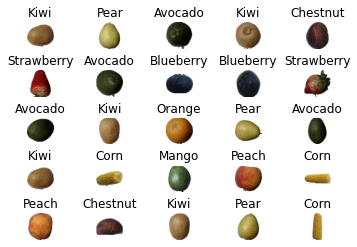

In [ ]:
fruit_map = {'0':'Avocado', '1':'Banana', '2':'Blueberry', '3':'Chestnut', '4':'Corn', '5':'Kiwi', '6':'Lemon', 
             '7':'Mango', '8':'Orange', '9':'Peach', '10':'Pear', '11':'Strawberry'}

fig = plt.figure()
fig.subplots_adjust(hspace=0.8)

rows = 5
cols = 5

sample = X_train[:25]
label = y_train[:25]
image = image_training[:25]

for data, img, target, index in zip(sample, image, label, range(25)) :
    data = data.reshape(1, 30000)
    pred = svm_clf.predict(data)
    fruit_name = fruit_map.get(str(pred[0]))
    ax = fig.add_subplot(rows, cols, index+1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(fruit_name)
    ax.axis("off")

In [ ]:
sample = X_test[:100]
label = y_test[:100]
pred_sample = svm_clf.predict(sample)
accuracy = pred_sample==label
true_cnt = np.unique(accuracy, return_counts=True)
print('accuracy :', true_cnt[1][1]/len(label))

accuracy : 0.92


In [ ]:
accuracy = pred_sample==label
true_cnt = np.unique(accuracy, return_counts=True)
print('accuracy :', true_cnt[1][1]/len(label))

accuracy : 0.92


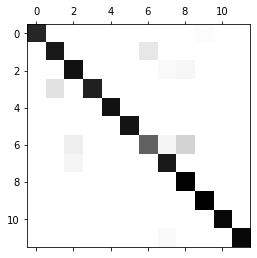

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = svm_clf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
plt.matshow(cf, cmap='binary')

In [ ]:
cf

array([[141,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  0, 150,   0,   0,   0,   0,  16,   0,   0,   0,   0,   0],
       [  0,   0, 154,   0,   0,   0,   0,   4,   6,   0,   0,   0],
       [  0,  19,   0, 145,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 154,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 153,   0,   0,   0,   0,   0,   0],
       [  0,   0,  11,   0,   0,   0, 103,   7,  29,   0,   0,   0],
       [  0,   0,   7,   0,   0,   0,   0, 149,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 164,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 166,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,   0,   0, 160]])

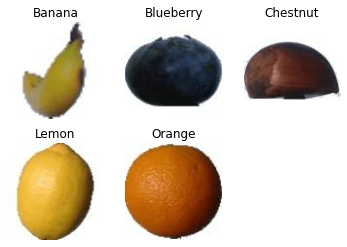

In [ ]:
fruit_name = ['Banana', 'Blueberry', 'Chestnut', 'Lemon', 'Orange']
path_for_test = '/content/drive/MyDrive/Colab_Notebooks/image/Test_set/'

fig = plt.figure()
fig.subplots_adjust(hspace=0.25)
rows = 2
cols = 3

for index, name in enumerate(fruit_name) :
    path = path_for_test+name+'/001.jpg'
    img = cv2.imread(path)
    ax = fig.add_subplot(rows, cols, index+1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(name)
    ax.axis("off")
 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       143
           1       0.89      0.90      0.90       166
          10       0.90      0.94      0.92       164
          11       1.00      0.88      0.94       164
           2       1.00      1.00      1.00       154
           3       1.00      1.00      1.00       153
           4       0.87      0.69      0.77       150
           5       0.91      0.96      0.93       156
           6       0.82      1.00      0.90       164
           7       0.99      1.00      0.99       166
           8       1.00      1.00      1.00       160
           9       1.00      0.98      0.99       164

    accuracy                           0.94      1904
   macro avg       0.95      0.94      0.94      1904
weighted avg       0.95      0.94      0.94      1904

